In [1]:
import loadmodel as lm

In [2]:
model = lm.loadResnet()

In [2]:
model= lm.loadResnetR()

My Attacker is True
Loading the robust ResNet-50 architectre
=> loading checkpoint './models/ResNet50_R.pt'
=> loaded checkpoint './models/ResNet50_R.pt' (epoch 105)


In [3]:
print(model)

Sequential(
  (0): MyAttackerModel(
    (normalizer): InputNormalize()
    (model): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): SequentialWithArgs(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_runni

In [15]:
print(model[0].model.layer4[-1])
for p in model.parameters():
    p.requires_grad = True

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)


In [16]:
import torchray
import numpy as np
import xml.etree.ElementTree as ET
import cv2
import time
import torch
from torch.autograd import Variable
from torchvision import models
import sys
import numpy as np
import torchvision.datasets as datasets
import glob
import torchray.benchmark
from torchray.attribution.gradient import gradient
from matplotlib import pyplot as plt
import torchray.benchmark.pointing_game
import os
import torchvision.transforms as transforms
import torchray.benchmark.pointing_game
from numpy import savetxt
from torchray.attribution.extremal_perturbation import extremal_perturbation, contrastive_reward, simple_reward
from torchray.attribution.grad_cam import grad_cam
import matplotlib.patches as patches
import loadmodel as lm
# Transforms needs to be applied to our data set
val_transforms = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])]) 

# 2000 images randomly taken from Imagenet(ILSVRC2012) validation set
vall = torchray.benchmark.datasets.ImageFolder('/home/gullesh/Desktop/VanillaVsARobust/validationSample', transform=val_transforms)

i=1483
img, labele = vall[i]

In [17]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

In [18]:
x = img.unsqueeze(0)
x = x.cuda()
print(type(x))
print(x.shape)

<class 'torch.Tensor'>
torch.Size([1, 3, 224, 224])


In [19]:
target_layer = model[0].model.layer4[-1]
print(target_layer)

Bottleneck(
  (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
)


In [20]:
cam = GradCAM(model=model, target_layer=target_layer, use_cuda=True)

In [21]:
print(cam)

In [22]:
grayscale_cam = cam(input_tensor=x, target_category=labele)

In [23]:
print(type(grayscale_cam))

<class 'numpy.ndarray'>


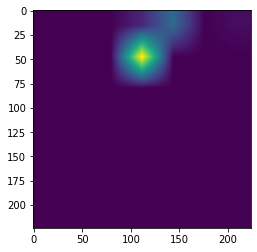

In [24]:
plt.imshow(grayscale_cam.transpose(1,2,0))
plt.show()

In [25]:
#grayscale_cam = grayscale_cam[0, :]
print(grayscale_cam.shape)
immg = img.permute(1,2,0)
imaj = (immg - immg.min()) / (immg.max() - immg.min())

(1, 224, 224)


In [26]:
print(imaj)
import numpy
aa = imaj.numpy()
print(type(aa))
imaj.shape

tensor([[[0.0000, 0.0173, 0.0659],
         [0.0000, 0.0173, 0.0659],
         [0.0000, 0.0173, 0.0659],
         ...,
         [0.2699, 0.1865, 0.1758],
         [0.2591, 0.1829, 0.1685],
         [0.2519, 0.1755, 0.1611]],

        [[0.0000, 0.0173, 0.0659],
         [0.0000, 0.0173, 0.0659],
         [0.0000, 0.0173, 0.0659],
         ...,
         [0.2735, 0.1902, 0.1794],
         [0.2663, 0.1865, 0.1758],
         [0.2591, 0.1829, 0.1685]],

        [[0.0000, 0.0173, 0.0659],
         [0.0000, 0.0173, 0.0659],
         [0.0000, 0.0173, 0.0659],
         ...,
         [0.2771, 0.1902, 0.1794],
         [0.2699, 0.1902, 0.1758],
         [0.2627, 0.1865, 0.1721]],

        ...,

        [[0.1872, 0.2307, 0.2820],
         [0.1944, 0.2380, 0.2857],
         [0.1908, 0.2380, 0.2930],
         ...,
         [0.1908, 0.2270, 0.2710],
         [0.1800, 0.2160, 0.2600],
         [0.1764, 0.2123, 0.2564]],

        [[0.1872, 0.2270, 0.2857],
         [0.1872, 0.2307, 0.2820],
         [0.

torch.Size([224, 224, 3])

In [21]:
visualization = show_cam_on_image(aa, grayscale_cam)

In [16]:
aa.max()

1.8022363

In [22]:
print(visualization)

[[[ 70   2   8]
  [ 70   2   8]
  [ 70   2   8]
  ...
  [104  23  22]
  [103  23  21]
  [102  22  20]]

 [[ 70   2   8]
  [ 70   2   8]
  [ 70   2   8]
  ...
  [105  24  22]
  [104  23  22]
  [103  23  21]]

 [[ 70   2   8]
  [ 70   2   8]
  [ 70   2   8]
  ...
  [105  24  22]
  [104  24  22]
  [103  23  21]]

 ...

 [[ 23 147 163]
  [ 24 148 164]
  [ 24 148 165]
  ...
  [ 24 147 162]
  [ 22 145 160]
  [ 22 145 160]]

 [[ 23 147 164]
  [ 23 147 163]
  [ 24 149 165]
  ...
  [ 23 146 161]
  [ 22 145 160]
  [ 22 144 160]]

 [[ 23 146 164]
  [ 24 147 163]
  [ 25 150 165]
  ...
  [ 22 146 160]
  [ 22 145 160]
  [ 21 143 159]]]


In [25]:
plt.imshow(grayscale_cam
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'permute'